### Correlation Plots

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd
import scipy.stats
import math
from ggplot import *

In [2]:
truth = "/mnt/scratch4/SLA-benchmarking/30percent/30percent.isoforms.results"
SLA = "/mnt/scratch4/SLA-benchmarking/30percent/Salmon-SLA09/result-SLA09/quant.sf"
Kallisto = "/mnt/scratch4/SLA-benchmarking/30percent/Kallisto0.43/result.gtf.kallisto/abundance.tsv"
Hera ="/mnt/scratch4/SLA-benchmarking/30percent/Hera-1.2/result-Hera1.2/abundance.tsv"
Star = "/mnt/scratch4/SLA-benchmarking/30percent/star/result.gtf.star/quant.salmon/quant.sf"

In [13]:
def parseResult(fileinfo):
    df = pd.DataFrame()
    for fname,filetype in fileinfo.items():
        print(filetype)
        if filetype == "RSEM":
            truth = pd.read_table(fname, delim_whitespace=True, \
                                  usecols=["transcript_id", "count"])
            truth.rename(index=str, \
                         columns={"transcript_id": "Name", "count": "count"}, inplace = True)
            
            if len(df) == 0:
                df = truth
            else:
                df = pd.merge(df,truth,on='Name',how='outer')
        elif filetype == "SLA":
            sla = pd.read_table(fname, delim_whitespace=True, \
                                 usecols=["Name", "NumReads"])
            if len(df) == 0:
                df = sla
            else:
                df = pd.merge(df,sla,on='Name',how='outer')
        elif filetype == "Kallisto":
            kallisto = pd.read_table(fname, delim_whitespace=True, \
                                     usecols=["target_id", "est_counts"])
            kallisto.rename(index=str, columns={"target_id": "Name", \
                                                "est_counts": "NumReads_KAL"}, inplace = True)
            if len(df) == 0:
                df = kallisto
            else:
                print(kallisto.columns)
                print(df.columns)
                df = pd.merge(df,kallisto,on='Name',how='outer')
        elif filetype == "HERA":
            hera = pd.read_table(fname, delim_whitespace=True, \
                                   usecols=["target_id", "est_counts"])
            hera.rename(index=str, columns={"target_id": "Name", "est_counts": "NumReads_HERA"}, \
                       inplace = True)
            if len(df) == 0:
                df = hera
            else:
                df = pd.merge(df,hera,on='Name',how='outer')
        elif filetype == "star":
            star = pd.read_table(fname, delim_whitespace=True, \
                                   usecols=["Name", "NumReads"])
            star.rename(index = str, columns={"Name": "Name", \
                                              "NumReads": "NumReads_STAR"}, inplace = True)
            if len(df) == 0:
                df = star
            else:
                df = pd.merge(df,star,on='Name',how='outer')
    return df

In [14]:
fileinfo = {truth:"RSEM",SLA:"SLA",Kallisto:"Kallisto",Hera:"HERA",Star:"star"}
df = parseResult(fileinfo)

star
Kallisto
Index([u'Name', u'NumReads_KAL'], dtype='object')
Index([u'Name', u'NumReads_STAR'], dtype='object')
RSEM
HERA
SLA


In [15]:
df.columns

Index([u'Name', u'NumReads_STAR', u'NumReads_KAL', u'count', u'NumReads_HERA',
       u'NumReads'],
      dtype='object')

In [16]:
df.set_index('Name',inplace=True)

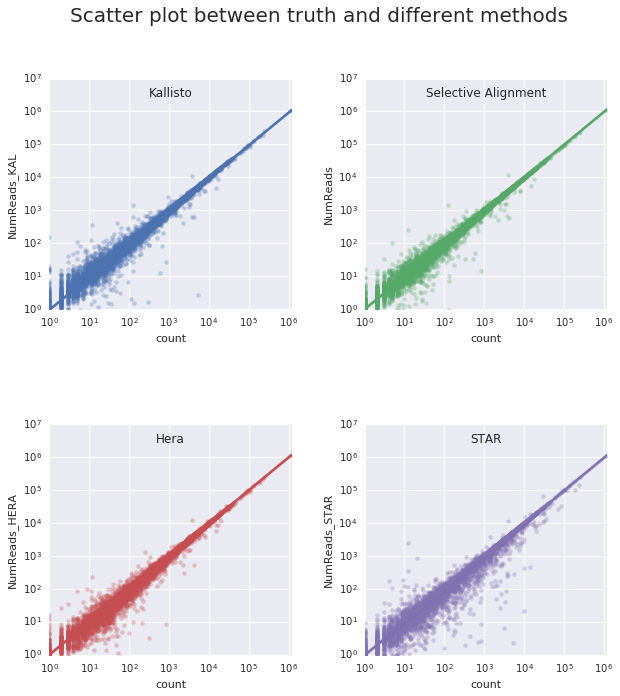

In [35]:
matplotlib.rcParams['figure.figsize']
fig, axs = plt.subplots(figsize=(10,10),ncols=2,nrows=2)
left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .3    # the amount of width reserved for blank space between subplots
hspace =  .5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)
y_title_margin = .9
plt.suptitle("Scatter plot between truth and different methods", y = 1, fontsize=20)
axs[0][0].set_title("Kallisto",                    y = y_title_margin)
axs[0][1].set_title("Selective Alignment",         y = y_title_margin)
axs[1][0].set_title("Hera", y = y_title_margin)
axs[1][1].set_title("STAR", y = y_title_margin)


#[axs[0][i].set_xlabel("True Abundance") for i in range(0, 2)]

sns.regplot(x ='count',y ='NumReads_KAL', data=df, scatter=True, scatter_kws={'alpha':0.3},ax=axs[0][0])
sns.regplot(x ='count',y ='NumReads', data=df, scatter=True, scatter_kws={'alpha':0.3},ax=axs[0][1])
sns.regplot(x ='count',y ='NumReads_HERA', data=df, scatter=True, scatter_kws={'alpha':0.3},ax=axs[1][0])
sns.regplot(x ='count',y ='NumReads_STAR', data=df, scatter=True, scatter_kws={'alpha':0.3},ax=axs[1][1])
for i in xrange(len(axs)):
    for j in xrange(len(axs)):
        axs[i][j].set_xscale('log')
        axs[i][j].set_yscale('log')
        axs[i][j].set_ylim(1)
        axs[i][j].set_xlim(1)